In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import dfca as DFCA
import ifca as IFCA

import numpy as np

from util import *

Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
rc = ipp.Cluster(n=2).start_and_connect_sync()
rc.activate()

rc.ids 

dview = rc[:]

Starting 2 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>
100%|██████████| 2/2 [00:06<00:00,  3.27s/engine]


In [3]:
seeds = [11,12,13,14,15]
learning_rates = [0.1]

dfca_gi = []
dfca_gi_std = []
ifca = []
ifca_std = []

In [4]:
%%px --targets all

import sys
import os
sys.path.append(os.getcwd())

seeds = [11,12,13,14,15]
learning_rates = [0.1]

dfca_gi = []
dfca_gi_std = []
ifca = []
ifca_std = []

Running the dfca-gi experiment

In [5]:
%%px --target 0 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np


with open("config_dfca_gi.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    res_std = np.std(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)
    dfca_gi_std.append(res_std)



<AsyncResult(%px): pending>

Running the ifca experiment

In [6]:
%%px --target 1 --noblock
import ifca as IFCA
import json
import time
import torch
import numpy as np

with open("config_ifca.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------IFCA, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = IFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    res_std = np.std(res_final, axis=0).tolist()
    ifca.append(res_mean)
    ifca_std.append(res_std)


<AsyncResult(%px): pending>

## Results

DFCA-GI Experiment Outputs

In [7]:
rc.wait_interactive()
_.display_outputs()

dfca_gi = rc[0].pull('dfca_gi', block=True)
dfca_gi = rc[0].pull('dfca_gi_std', block=True)
ifca = rc[1].pull('ifca', block=True)
ifca_std = rc[1].pull('ifca_std', block=True)

unknown: 100%|██████████| 2/2 [02:01<00:00, 60.76s/tasks]
---------------------------------IFCA, lr: 0.1, seed: 11---------------------------------
config: {'m': 1200, 'm_test': 200, 'p': 4, 'n': 200, 'uneven': True, 'h1': 200, 'num_epochs': 1, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 11, 'train_seed': 11, 'config_override': '', 'project_dir': 'output_ifca'}
Using device: cuda
Epoch -1 tr: l 2.293 a 0.112 clct[np.int64(440), np.int64(260), np.int64(363), np.int64(137)] cl_acc 0.480  3.482sec
Epoch -1 tst: l 2.294 a 0.112 clct[np.int64(74), np.int64(38), np.int64(65), np.int64(23)] cl_acc 0.440  0.610sec
Epoch 0 tr: l 2.179 a 0.328 clct[np.int64(301), np.int64(300), np.int64(284), np.int64(315)] cl_acc 0.953  lr 0.100000 6.648sec(train) 4.626sec(infer)
Epoch 0 tst: l 2.179 a 0.330 clct[np.int64(50), np.int64(49), np.int64(51), np.int64(50)] cl_acc 0.930  0.994sec
result written at output_ifca\results.pickle
checkpoint written at output_ifca\checkpoint.pt
---train cluster En

IFCA Experiment Outputs

In [8]:
__.display_outputs()

---------------------------------DFCA-GI, lr: 0.1, seed: 11---------------------------------
config: {'m': 1200, 'm_test': 200, 'p': 4, 'n': 200, 'uneven': True, 'local_model_init': False, 'h1': 200, 'num_epochs': 1, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 11, 'train_seed': 11, 'config_override': '', 'project_dir': 'output_dfca_gi'}
Using device: cuda
Epoch -1 tr: l 2.293 a 0.112 clct[np.int64(440), np.int64(260), np.int64(363), np.int64(137)] cl_acc 0.480  3.767sec
Epoch -1 tst: l 2.293 a 0.135 clct[np.int64(74), np.int64(38), np.int64(65), np.int64(23)] cl_acc 0.440  2.972sec
Epoch 0 tr: l 2.149 a 0.351 clct[np.int64(327), np.int64(294), np.int64(317), np.int64(262)] cl_acc 0.645  lr 0.100000 13.813sec(train) 3.903sec(infer)
Epoch 0 tst: l 2.165 a 0.341 clct[np.int64(54), np.int64(42), np.int64(70), np.int64(34)] cl_acc 0.515  3.073sec
result written at output_dfca_gi\results.pickle
checkpoint written at output_dfca_gi\checkpoint.pt
---train cluster Ended in 0.01 hour (

## Plots

IndexError: list index out of range

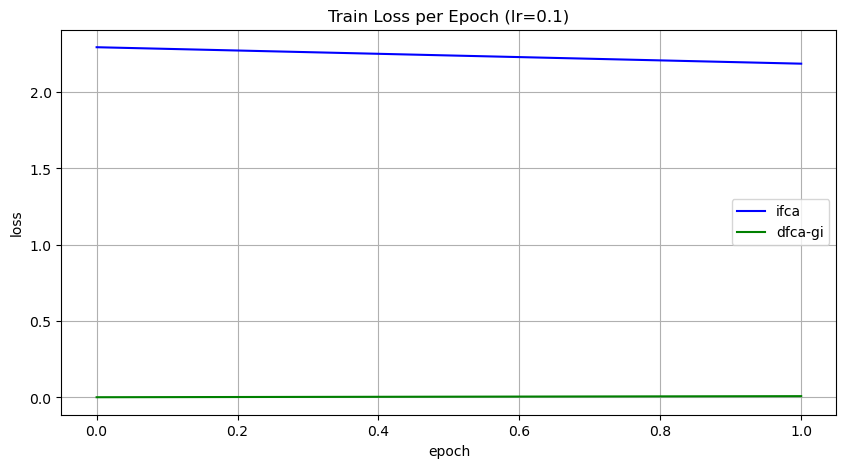

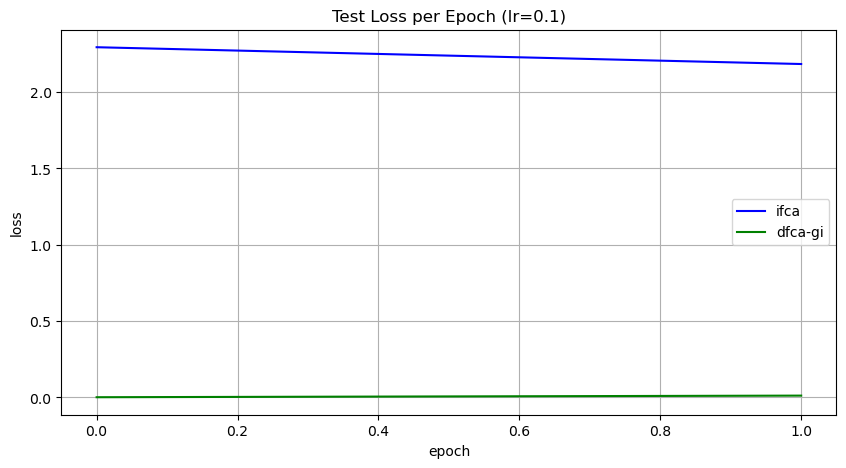

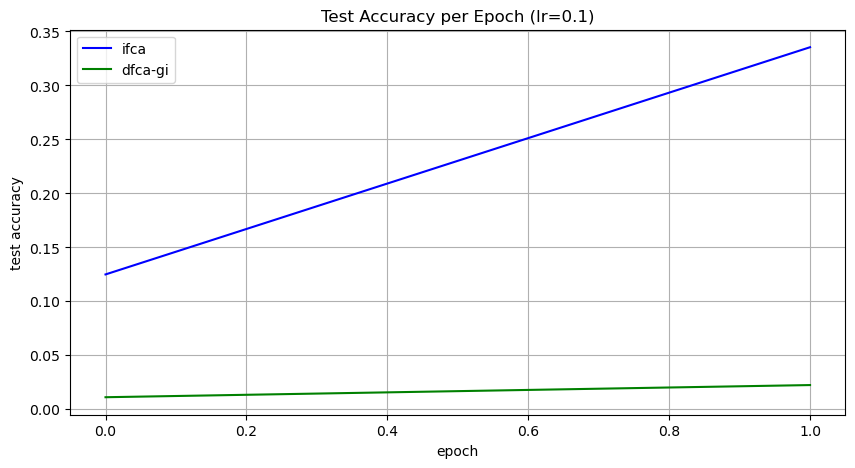

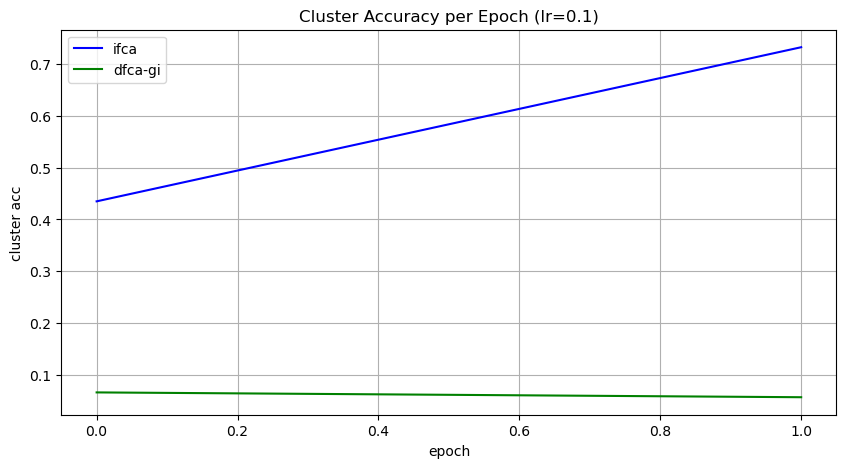

<Figure size 1000x500 with 0 Axes>

In [ ]:

r_ifca = {}
r_dfca_gi = {}

r_ifca['test_loss'] = []
r_ifca['test_acc'] = []
r_ifca['cl_acc'] = []
r_ifca['train_loss'] = []
for i in range(len(learning_rates)):
    r_ifca['test_loss'].append(ifca[i][0])
    r_ifca['test_acc'].append(ifca[i][1])
    r_ifca['cl_acc'].append(ifca[i][2])
    r_ifca['train_loss'].append(ifca[i][3])

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])



os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):
    epochs = np.arange(len(r_ifca['train_loss'][l]))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['train_loss'][l], label='ifca', color='blue')
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Train Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_loss'][l], label='ifca', color='blue')
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_acc'][l], label='ifca', color='blue')
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_test_acc.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['cl_acc'][l][:31], label='ifca', color='blue')
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('cluster acc')
    plt.title(f'Cluster Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_cluster_acc.png'))

    plt.figure(figsize=(10,5))
    plt.errorbar(epochs[:31], r_dfca_gi['cl_acc'][l][:31], yerr=dfca_gi_std[2][:31], capsize=2)
    plt.xlabel('epoch')
    plt.ylabel('cluster acc')
    plt.title(f'DFCA Cluster Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_dfca_cluster_acc.png'))

    plt.figure(figsize=(10,5))
    plt.errorbar(epochs[:31], r_ifca['cl_acc'][l][:31], yerr=ifca_std[2][:31], capsize=2)
    plt.xlabel('epoch')
    plt.ylabel('cluster acc')
    plt.title(f'IFCA Cluster Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_ifca_cluster_acc.png'))
